<a href="https://colab.research.google.com/github/aliciaseidou/Forecasting_CA/blob/main/Copy_of_Non_SeasonalForecastingCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALYSIS OF WEEKLY PASSENGER JOURNEYS ON THE LUAS TRAM SERVICE

Susan Locatelli (C22342081)

Alicia Seidou (C22495584)


### INTRODUCTION

This project aims to conduct a time series analysis of passenger journey data collected from the Luas tram service in Dublin, Ireland. The dataset encompasses weekly records of passenger counts, offering insights into the utilization patterns of the tram service over the selected time frame.

### DATA SOURCE

The dataset is obtained from data.gov.ie, Ireland's public sector data portal, which provides free access to datasets produced by various government bodies.
Specifically, this dataset pertains to the number of passenger journeys recorded on a weekly basis for the Luas tram service during the year 2019.


### BACKGROUND

After 5 days of research and indecision, we found a dataset on data.gov.ie that gave us lots of ideas. We thought the Luas tram service played a vital role in Dublin's public transport system. Therefore, analysing passenger travel data helps to understand usage patterns, aiding in transport planning, service optimization and policy making. This project focuses on non-seasonal analysis to provide insights into underlying trends and fluctuations in passenger travel without the influence of seasonal patterns.

### OBJECTIVE

The goal is to apply non-seasonal time series analysis models, such as ETS and ARIMA, to the Luas tram service passenger journey data. The project aims to identify, estimate, check, and forecast trends in the data, providing valuable insights for transportation planning and operational decision-making.

### DATA DESCRIPTION

The dataset features weekly passenger journey counts for the Luas tram service in 2023, including the following key columns:
Year: The year of the record.
Week: The week number within the year.
Passenger Journeys: The count of passenger journeys recorded each week.


### METHODOLOGY

We plan on using the matplotlib library on python to accurately plot data set vs time. From plotting the data, we will use a technique called the Augmented Dicker Fuller(ADF) test to test for stationarity. The ADF test tests for the presence of a unit root in the data which indicates the data set is not stationary. If the dataset is not stationary we will use differencing(d = 1) to get the dataset stationary.
Once the data is stationary we can plot the ACF which stands for the Autocorrelation Function. By plotting the ACF we can see if the values from the time series are directly correlated with each other. From analysing the ACF plot, we can then conclude if the time series is a random walk or a moving average process by seeing if the values become insignificant after q lags.
If it is none of the processes mentioned we will then have to go on to plot the PACF to see if the series is a Autoregressive process or an ARMA process. A statistical technique used in time series analysis for assessing the amount of correlation between a variable and its lag values while accounting for correlations at all lower lags is the Partial Autocorrelation Function, or PACF. After removing the connections of any intervening observations, it gives a summary of the relationship between an observation in a time series and observations at earlier time steps.
After identifying the process needed we will then split the data set into a training and  testing set.
We will utilize time series analysis techniques, focusing on ETS and ARIMA models, to explore and forecast the tram service's passenger journey trends. The project includes data visualization to illustrate the time series, trend identification, and model-based forecasting.

### EXPECTED OUTCOMES

The analysis will uncover non-seasonal patterns and trends in Luas tram service usage, facilitating a better understanding of demand dynamics and enabling more informed planning and decision-making processes.


### CONCLUSION

By leveraging open data from data.gov.ie and applying rigorous time series analysis, this project aims to enhance the understanding of public transportation usage patterns in Dublin, contributing to improved service planning and passenger experience in the Luas tram service.

In [ ]:
!pip install statsmodels

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
from itertools import product

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df = pd.read_csv('ForecastingLuas (1).csv')
df.head()


,Weeks,Passenger Journeys
0,Week 01,549533
1,Week 02,839022
2,Week 03,819359
3,Week 04,860745
4,Week 05,912795


In [ ]:
df.tail()

,Weeks,Passenger Journeys
47,Week 48,1113668
48,Week 49,1080791
49,Week 50,1151098
50,Week 51,1173473
51,Week 52,538511


In [ ]:
df.fillna(0, inplace = True)

In [ ]:
df['Passenger Journeys'].isnull().sum()

0

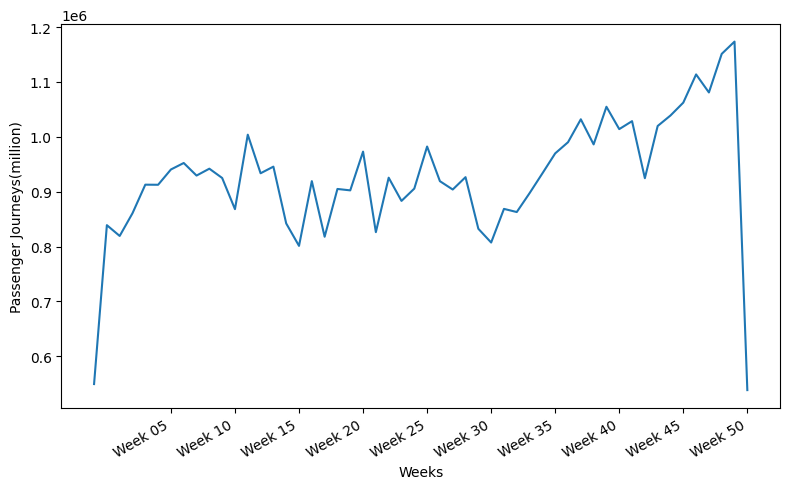

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(df['Weeks'], df['Passenger Journeys'])
ax.set_xlabel('Weeks')
ax.set_ylabel('Passenger Journeys(million)')
plt.xticks(
    [6, 11, 16, 21, 26, 31, 36, 41, 46, 51],
    ['Week 05', 'Week 10', 'Week 15', 'Week 20', 'Week 25', 'Week 30', 'Week 35', 'Week 40','Week 45', 'Week 50'])

fig.autofmt_xdate()
plt.tight_layout()


*Figure 1*
1. **Y-Axis (Passenger Journeys)**:

The y-axis represents the number of passenger journeys, scaled in millions. It ranges from just below 0.7 million to slightly above 1.1 million. This metric indicates the total number of passengers using the Luas tram service each week.
2. **X-Axis (Weeks)**:

The x-axis labels specific weeks from 'Week 05' to 'Week 50', marking every fifth week. This suggests the data covers most of the year but does not include all 52 weeks. It helps in understanding the temporal spread of the data across the year.
3. **Data Trends**:

* Initially, there is a sharp decline in passenger journeys from just over 1 million to below 0.7 million from the beginning of the graph (around Week 05) to shortly thereafter. This might indicate a specific event or seasonal variation that caused a temporary drop in usage.
* Following this decline, the number of journeys generally trends upward with some fluctuations. Around mid-year (from Week 25 to Week 35), the passenger counts stabilize with less variance compared to other periods.
* Starting from approximately Week 35, there is a consistent upward trend, peaking towards Week 50. This upward trend could be attributed to seasonal effects such as increased travel during holiday seasons or other factors influencing more frequent use of the tram service.
4. **Variability**:

The plot shows weekly fluctuations throughout the year. These could be influenced by various factors, including holidays, special events, or weather conditions that typically affect public transportation usage.
5. **Overall Insights**:

The general increase towards the end of the year might suggest seasonal patterns where more people use the tram service. However, the significant dip at the start and the gradual recovery indicate there could be specific weeks where external factors drastically affect ridership.

# Test dataset for stationarity

In [ ]:
result = adfuller(df['Passenger Journeys'])

print('ADF Statistic:', result[0])
print('p-value:' ,result[1])

ADF Statistic: -4.712967276950338
p-value: 7.955726492007509e-05


We can see that the p-value is less than 0.05 so therefore we can conclude that the dataset is stationary

Now that the dataset is stationary we must now investigate if the values are correlated. We can test this by plotting the ACF.

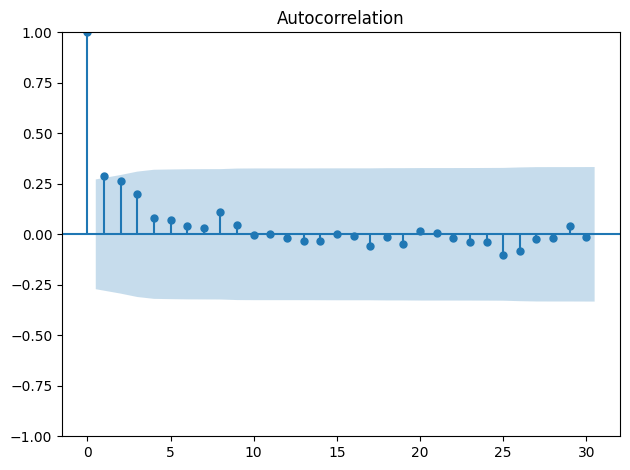

In [ ]:
plot_acf(df['Passenger Journeys'], lags=30);

plt.tight_layout()

*Figure 2*

From plotting the ACF we can see that there is autocorrelation but autocorrelation coefficients do not become abruptly non-significant
after lag q. Now we will plot the PACF to see if this dataset requires an AR or ARMA process

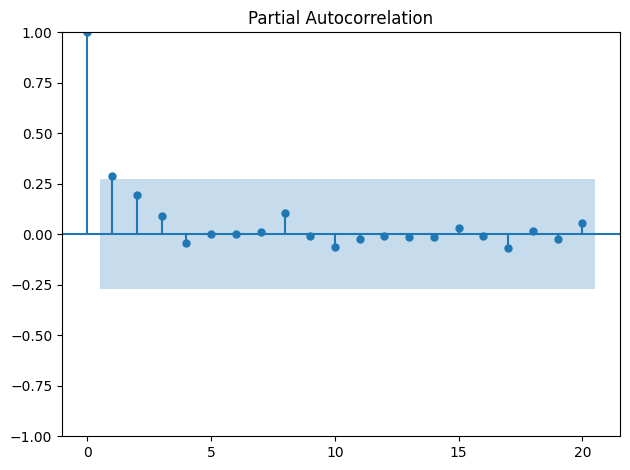

In [ ]:
plot_pacf(df['Passenger Journeys'], lags=20);

plt.tight_layout()

*Figure 3*

Since there is a significant spike at lag 1 and the PACF cuts off thereafter, this suggests that an **ARMA** model may be appropriate for modeling this time series. This model would generally take the form **Yt = c + ϕ1Yt−1 + θ1εt−1 + εt** where:

 * ϕ1 is the autoregressive coefficient for the first lag,
 * θ1 is the moving average coefficient for the first lag,
 * c is a constant,
 * εt represents the error term.

The ARMA model effectively combines autoregressive and moving average components, which makes it suitable when the dataset indicates autocorrelation at the first lag and a quick cutoff in the PACF, as observed. This structure allows the model to capture the persistence of the shocks as well as the tendency of the series to revert to its mean.

# Split dataset into train/test

In [ ]:
df = pd.DataFrame(df)

#train = df[:45]
#test = df[45:]
y= df['Passenger Journeys']
train = y[:45]
test = y[45:]
print(len(train))
print(len(test))

NameError: name 'pd' is not defined

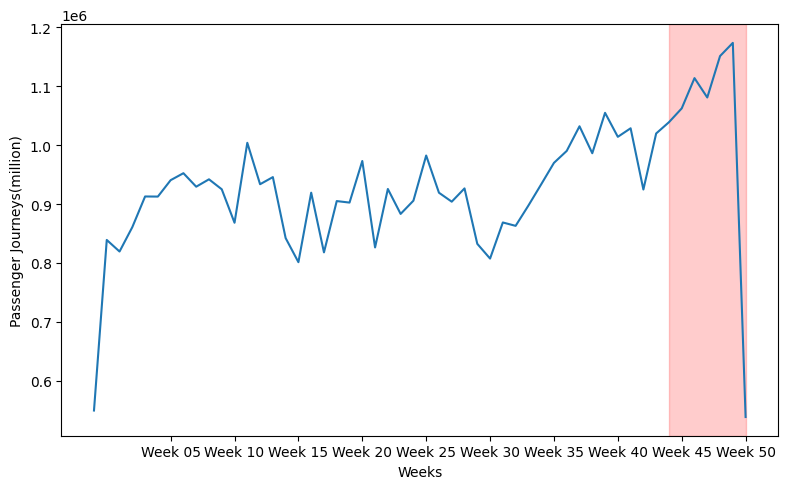

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(df['Weeks'], df['Passenger Journeys'])
ax.set_xlabel('Weeks')
ax.set_ylabel('Passenger Journeys(million)')
plt.xticks(
    [6, 11, 16, 21, 26, 31, 36, 41, 46, 51],
    ['Week 05', 'Week 10', 'Week 15', 'Week 20', 'Week 25', 'Week 30', 'Week 35', 'Week 40','Week 45', 'Week 50'])
ax.axvspan(45, 51, color='red', alpha=0.2)

plt.tight_layout()

*Figure 4*

**Visual Elements:**

* **Training Data (Non-highlighted area, Weeks 05 to 44)**: This part of the time series represents the data used to train the model. It spans from early in the year through late autumn, covering a variety of passenger journey trends including initial declines, stabilizations, and moderate increases. This period is crucial as it allows the model to learn from a broad spectrum of conditions, encompassing typical weekly fluctuations and minor seasonal variations. The objective is to equip the forecasting model with enough historical data to identify and learn underlying patterns and seasonal effects.

* **Testing Data (Red Highlighted area, Weeks 45 to 50)**: The shaded area indicates the portion of data set aside for testing the model. This segment was chosen to cover the year-end, a period likely characterized by high variability and increased passenger volumes, potentially due to the holiday season. This selection is strategic because it challenges the model to predict under potentially atypical conditions, testing its robustness and accuracy in forecasting during peak demand periods.



# ARMA

In [ ]:
from typing import Union

def optimize_ARMA(train, order_list) -> pd.DataFrame:

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(train, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue

        aic = model.aic
        bic=model.bic
        results.append([order, aic,bic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC','BIC']

    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [ ]:
ps = range(0, 3, 1)
qs = range(0, 3, 1)

order_list = list(product(ps, qs))
print(order_list)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


In [ ]:
train

0      549533
1      839022
2      819359
3      860745
4      912795
5      912612
6      940476
7      952291
8      929391
9      941919
10     924998
11     868205
12    1003871
13     933575
14     945662
15     842186
16     801296
17     919255
18     817933
19     904983
20     902415
21     973025
22     826269
23     925516
24     883208
25     905636
26     982288
27     919158
28     903958
29     926491
30     832452
31     807393
32     868677
33     862939
34     897355
35     933362
36     969818
37     990123
38    1031937
39     986159
40    1054749
41    1014017
42    1028522
43     924586
44    1019705
Name: Passenger Journeys, dtype: int64

In [ ]:
result_df = optimize_ARMA(train, order_list)
result_df

  0%|          | 0/9 [00:00<?, ?it/s]

,"(p,q)",AIC,BIC
0,"(2, 0)",1144.126427,1149.546414
1,"(1, 2)",1144.186644,1151.413294
2,"(2, 2)",1146.265997,1155.299309
3,"(2, 1)",1147.121281,1154.347931
4,"(1, 0)",1148.577168,1152.190493
5,"(1, 1)",1149.062752,1154.482739
6,"(0, 2)",1332.877594,1338.297582
7,"(0, 1)",1337.732350,1341.345675
8,"(0, 0)",1365.077921,1366.884583


In [ ]:
model = SARIMAX(train, order=(2,0,0), simple_differencing=False)
model_fit = model.fit(disp=False)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     Passenger Journeys   No. Observations:                   45
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -569.063
Date:                Tue, 07 May 2024   AIC                           1144.126
Time:                        22:06:43   BIC                           1149.546
Sample:                             0   HQIC                          1146.147
                                 - 45                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4412      0.051      8.605      0.000       0.341       0.542
ar.L2          0.5573      0.051     11.028      0.000       0.458       0.656
sigma2      3.181e+09   6.18e-12   5.15e+20      0.0

### 1. **Model Parameters and Fit**
* **Autoregressive Coefficients** (ar.L1 and ar.L2):
 * The coefficients for L1 (0.4412) and L2 (0.5573) are both statistically significant, indicating that the current value of "Passenger Journeys" is positively influenced by the values at the first and second lags. This suggests a strong dependency on the immediate past two observations, which is typical in time series where past values inform future trends.
 * The magnitude of these coefficients shows more influence from the second past observation than the first, possibly hinting at a pattern or cycle every two periods that might be important.

* **Model Fit Indicators (Log Likelihood, AIC, BIC)**:
 * **Log Likelihood (-569.063)**: Lower (more negative) than ideal, suggesting room for improvement in model fit.
 * **AIC (1144.126) and BIC (1149.546)**: These values serve as relative measures of the model’s performance and complexity. The model with the lowest AIC and BIC in a set of models is typically preferred. However, these values alone don't guarantee an optimal model but suggest that among tested models, this configuration (2,0,0) might be effective given its simplicity and the data available.

### 2. **Diagnostic Testing**
* **Ljung-Box Test**:
 * A p-value of 0.18 indicates there is no significant autocorrelation at lag 1 in the residuals. This result suggests that the model does a good job of capturing the time series dynamics without leaving patterns in the residuals, which is crucial for the reliability of forecasts.
* **Jarque-Bera Test**:
 * The low p-value (0.02) indicates that the residuals do not follow a normal distribution, which could be a concern as it suggests potential issues with the assumption underlying the model's estimation techniques. This might lead to unreliable statistical inferences about coefficients and model predictions.
* **Heteroskedasticity Test**:
 * The p-value of 0.07 borders on significant, suggesting possible heteroskedasticity, where the error variance might change over time. This could affect forecast accuracy, especially if the variance increases during peak periods.

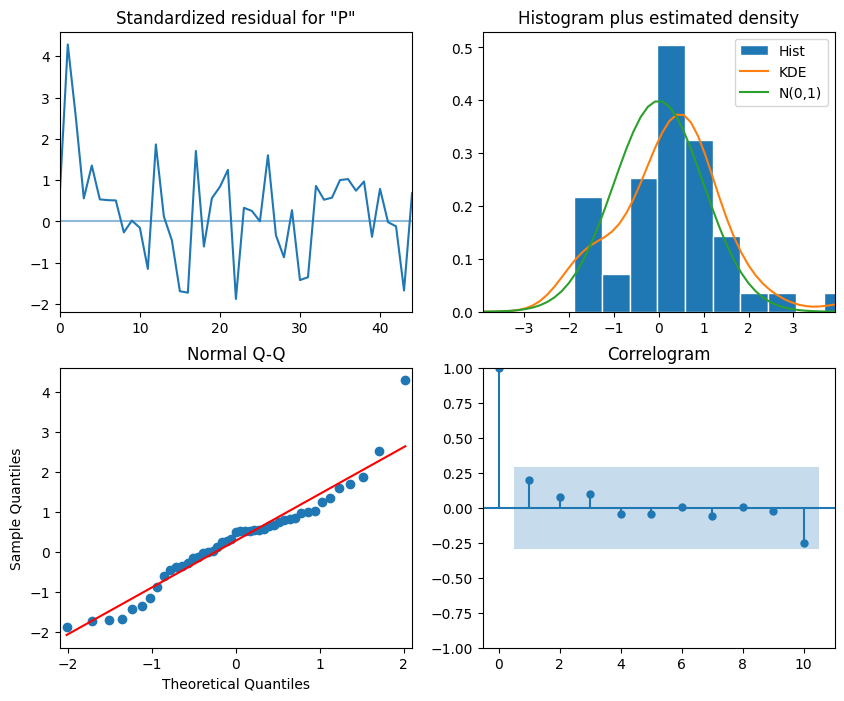

In [ ]:
model_fit.plot_diagnostics(figsize=(10, 8));


*Figure 5*

### 1. Standardized Residual Plot

 * **Observations**: This plot shows the residuals from the model over time. Ideally, these residuals should appear as white noise, meaning they should be randomly scattered around zero without any identifiable pattern.
 * **Interpretation**: The residuals do not show any obvious patterns or trends, which is good as it suggests that the model is capturing most of the information in the data. However, the presence of spikes might indicate occasional shocks to the system that the model is not capturing.

### 2. Histogram and Estimated Density Plot

 * **Observations**: This plot includes the histogram of the residuals, overlaid with a kernel density estimate (KDE) and a normal distribution for comparison.
 * **Interpretation**: The residuals should ideally follow a normal distribution if the model is well-specified. In this case, the histogram and KDE show that the residuals are not perfectly normal—they exhibit slight asymmetry and heavier tails compared to the normal distribution.

### 3. Normal Q-Q Plot

 * **Observations**: This plot compares the quantiles of the model's residuals against the quantiles of a theoretical normal distribution.
 * **Interpretation**: Points in this plot should ideally lie on the red line if the residuals are normally distributed. The Q-Q plot reveals deviations from the line, especially at the tails. This indicates that the residuals have outliers or are leptokurtic (have peaks higher than a normal distribution). Such behavior can often lead to underestimation of the variability in the forecasts, affecting confidence intervals and predictive accuracy.

### 4. Correlogram (ACF Plot)

 * **Observations**: This plot displays the autocorrelation of the residuals at different lags. For a good model, most (if not all) of these should fall within the blue confidence interval, suggesting no significant autocorrelation.
 * **Interpretation**: The correlogram shows that the autocorrelations for all lags are within the confidence bounds. It indicates that the residuals are random, confirming that the model is adequately capturing the time-dependent structure in the data without leaving patterns in the residuals.

### Ljung-Box test

It is a statistical test used to determine whether any of a group of autocorrelations of a time series are different from zero.

1. **lb_stat (Ljung-Box Statistic)**: This statistic is a measure of the overall evidence against the null hypothesis that the residuals are independently distributed. A higher value suggests stronger evidence against the null hypothesis.

2. **lb_pvalue (P-value)**: This indicates the probability of observing the test statistic as extreme as, or more extreme than, what is observed under the null hypothesis of no autocorrelation. A low p-value (typically < 0.05) suggests rejecting the null hypothesis, indicating the presence of autocorrelation at that lag.

In [ ]:
residuals = model_fit.resid

acorr_ljungbox(residuals, np.arange(1, 11, 1))

,lb_stat,lb_pvalue
1,6.733577,0.009461
2,8.061948,0.017757
3,8.285809,0.040460
4,8.417684,0.077422
5,8.419467,0.134583
6,8.445697,0.207234
7,8.447712,0.294774
8,8.476070,0.388399
9,8.495324,0.485100
10,9.422527,0.492528


### Breakdown of Results

* **Lags 1 to 4**:
 * At lag 1, the p-value is 0.009461, which is below the 0.05 threshold, suggesting significant autocorrelation at this lag. This indicates that the residuals at lag 1 are not random.
* This trend continues mildly up to lag 4, where the p-values gradually increase, reaching 0.077422, which is above the typical significance level of 0.05, indicating less evidence of autocorrelation as the lag increases.
* **Lags 5 to 10**:
 * From lag 5 onwards, the p-values increase significantly, well above the 0.05 threshold (ranging from 0.134583 to 0.492528), suggesting that there is no significant autocorrelation at these lags. This is an indication that any autocorrelation that affects the residuals does not persist beyond the fourth lag.

In [ ]:
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:

    total_len = train_len + horizon
    end_idx = train_len

    if method == 'mean':
        pred_mean = []

        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))

        return pred_mean

    elif method == 'last':
        pred_last_value = []

        for i in range(train_len, total_len, window):
            last_value = df.iloc[i-1]
            #last_value = df[:i].iloc[i-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))

        return pred_last_value

    elif method == 'ARMA':
        pred_ARMA = []

        for i in tqdm_notebook(range(train_len, total_len, window)):
            model = SARIMAX(df[:i], order=(2,0,2))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_ARMA.extend(oos_pred)

        return pred_ARMA

In [ ]:
df['Passenger Journeys'] = pd.to_numeric(df['Passenger Journeys'], errors='coerce')

In [ ]:
train = df[45:]
test = df[:45]

In [ ]:
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 5

pred_mean = rolling_forecast(y, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(y, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_ARMA = rolling_forecast(y, TRAIN_LEN, HORIZON, WINDOW, 'ARMA')

#test.loc['pred_mean'] = pred_mean
test.loc[:, 'pred_mean'] = pred_mean
#test.loc['pred_last_value'] = pred_last_value
test.loc[:, 'pred_last_value'] = pred_last_value
#test.loc['pred_ARMA'] = pred_ARMA
test.loc[:, 'pred_ARMA'] = pred_ARMA

test.head()

  0%|          | 0/9 [00:00<?, ?it/s]

,Weeks,Passenger Journeys,pred_mean,pred_last_value,pred_ARMA
0,Week 01,549533,833506.0,940476,898769.224126
1,Week 02,839022,833506.0,940476,856045.729258
2,Week 03,819359,833506.0,940476,796665.195505
3,Week 04,860745,833506.0,940476,723119.682833
4,Week 05,912795,833506.0,940476,638055.266539


### Columns

* **Weeks**: Shows the week numbers for which the forecasts are made, allowing to track predictions over time.
* **Passenger Journeys**: The actual observed passenger numbers for these weeks. This column is crucial as it serves as the benchmark against which to evaluate the accuracy of the forecasts.
* **pred_mean**: This column shows predictions based on the average of past data up to the point of prediction. The predictions are constant across all weeks, reflecting the average passenger journeys calculated from the training data. This method does not adapt to changes over time, leading to static predictions.
* **pred_last_value**: Displays predictions that replicate the last observed value from the training data. Like the mean forecast, these predictions are the same for all weeks, indicating that this method assumes conditions remain stable and unchanging, which is rarely the case in dynamic environments like passenger transport.
* **pred_ARMA**: Contains predictions from an ARMA(2,0,2) model, showing a varying forecast that attempts to adjust based on the trends and cycles identified in the historical data. These predictions change from week to week, reflecting the ARMA model's ability to incorporate recent changes into its forecasts.

**Consistency and Variation**: The constant values in the pred_mean and pred_last_value columns suggest that these methods may not be effective for datasets where trends, seasons, or cycles influence the data significantly. In contrast, the pred_ARMA method offers dynamic predictions that potentially adapt better to such complexities.


# MAPE

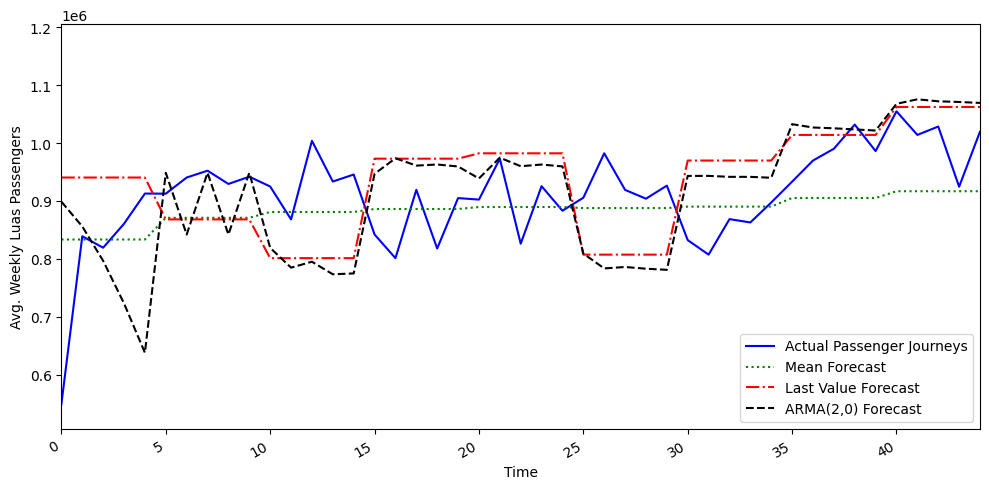

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df['Passenger Journeys'], 'b-', label='Actual Passenger Journeys')

# Plot predictions
ax.plot(test.index, test['pred_mean'], 'g:', label='Mean Forecast')
ax.plot(test.index, test['pred_last_value'], 'r-.', label='Last Value Forecast')
ax.plot(test.index, test['pred_ARMA'], 'k--', label='ARMA(2,0) Forecast')

# Legend
ax.legend(loc='lower right')

# Label axes
ax.set_xlabel('Time')
ax.set_ylabel('Avg. Weekly Luas Passengers')

# Highlight the specified region with actual index values
if all(idx in test.index for idx in [45, 46, 47, 48, 49, 50, 51]):
    ax.axvspan(45, 51, color='#808080', alpha=0.2)

ax.set_xlim(test.index.min(), test.index.max())

fig.autofmt_xdate()
plt.tight_layout()
plt.show()


*Figure 6*

### Visual Analysis of the Forecast Methods

1. **Actual Passenger Journeys (Blue Solid Line)**:
This line represents the real-world data for passenger journeys. It shows noticeable fluctuations and some periodic trends or seasonal patterns. The actual data appears to have cycles that may correspond to external factors such as holidays, events, or other seasonal influences.

2. **Mean Forecast (Green Dotted Line)**:
The Mean Forecast remains constant throughout, reflecting the overall average of the passenger journeys up to the split point between training and test data. This method does not react to any changes in the data, providing a baseline reference but failing to capture any trends or seasonality.

3. **Last Value Forecast (Red Dash-Dot Line)**:
This forecast method projects the last observed value into the future. It appears as a horizontal line that starts after the training period and extends through the forecast horizon. While slightly more dynamic than the mean forecast in terms of starting point, it still fails to adapt to any changes or trends in the data.

4. **ARMA(2,0) Forecast (Black Dashed Line)**:
The ARMA model predictions show more variation and attempt to follow the trend and cyclical nature of the actual data. This line fluctuates and appears to somewhat mimic the shape of the actual data graph, reflecting the model's attempt to capture underlying patterns such as autocorrelation within the data.

In [ ]:
from sklearn.metrics import mean_squared_error
mse_mean = mean_squared_error(test['Passenger Journeys'], test['pred_mean'])
mse_last = mean_squared_error(test['Passenger Journeys'], test['pred_last_value'])
mse_ARMA = mean_squared_error(test['Passenger Journeys'], test['pred_ARMA'])



print(mse_mean, mse_last, mse_ARMA)

6027885017.59774 13608194488.666666 14154975835.40666


### Interpretation of MSE Results

1. **Mean Forecast MSE (mse_mean): 6,027,885,017.60**
 * This is the lowest MSE among the three methods, indicating that on average, the squared prediction error for the mean forecast method is smaller compared to the other methods. This suggests that using the average of past data as a forecast, despite being a simple approach, has relatively lower overall error in predicting the future values in this particular case.
2. **Last Value Forecast MSE (mse_last): 13,608,194,488.67**
 * The Last Value Forecast has a significantly higher MSE compared to the Mean Forecast. This method, which uses the last observed value to predict future values, resulted in greater prediction errors. This could be indicative that the passenger journey data may have significant fluctuations that a static value from the last observation fails to capture.
3. **ARMA(2,0) Forecast MSE (mse_ARMA): 14,154,975,835.41**
 * The ARMA model has the highest MSE of all, which is somewhat surprising given that ARMA models are typically more adaptive to changes in data patterns than simple methods like mean or last value forecasts. This high error suggests that the specific ARMA(2,0) model configuration might not be well suited to this dataset or perhaps was not adequately capturing the underlying patterns and trends in the data.

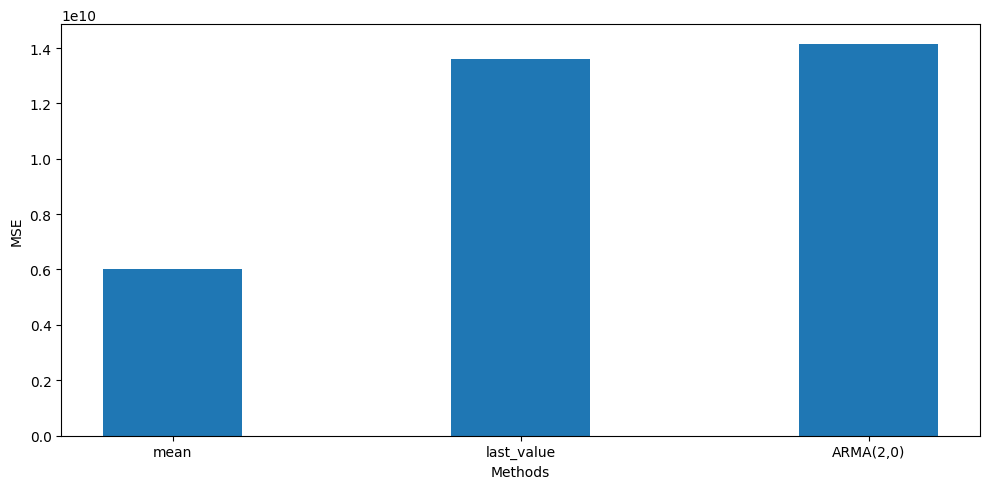

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

x = ['mean', 'last_value', 'ARMA(2,0)']
y = [mse_mean, mse_last, mse_ARMA]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')

plt.tight_layout()

*Figure 7*

The bar chart illustrates the Mean Squared Error (MSE) for three different forecasting methods: Mean, Last Value, and ARMA(2,0). This visualization helps to compare the accuracy of each method quantitatively, using MSE as the metric.


### Interpretation

1. MSE Values:
 * **Mean Forecast**: Shows the lowest MSE among the three methods, which suggests that it has the smallest average squared differences between the forecasted and actual values. This result indicates that despite its simplicity, the mean forecast method has performed relatively well for this dataset, possibly due to the dataset's average not fluctuating dramatically over the time period considered.
 * **Last Value Forecast**: Displays a significantly higher MSE than the mean forecast. This indicates that simply using the last observed value to predict future values does not capture enough of the dynamics in the data, leading to larger errors on average.
 * **ARMA(2,0) Forecast**: Surprisingly, the ARMA model shows the highest MSE, even higher than the last value forecast. This might suggest that the model configuration (i.e., the choice of parameters) is not optimal or that the ARMA model is not capturing the underlying patterns effectively, potentially due to model mis-specification, overfitting, or an inappropriate model choice for this particular type of data.
2. Comparative Analysis:
 * The mean forecast's lower MSE suggests that the data might be hovering around a central tendency that does not change dramatically, which the mean method captures well.
 * The higher MSEs for last value and ARMA forecasts might imply these methods may be too dependent on recent trends or values, which do not predict future values well in this context.

# Conclusion

The analysis revealed that while traditional time series models like ARMA are powerful, their effectiveness is highly contingent on the correct specification of model parameters and the inherent properties of the data, such as stationarity and autocorrelation. The superior performance of simpler models on some metrics suggested that sometimes, less complex models can be more effective, depending on the data characteristics.

